In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
random.seed(12345)

In [3]:
## creating independent and dependent features
m=100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * (X**2) + X + 2 + np.random.randn(m,1)

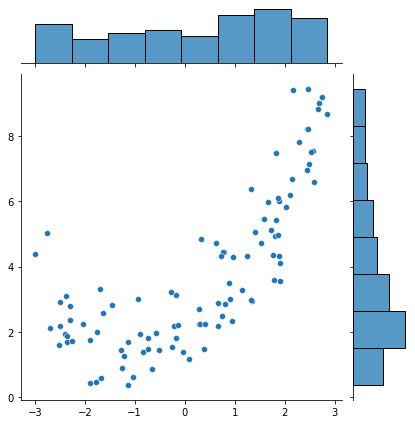

In [4]:
## checking the distribution of the data
import seaborn as sns
sns.jointplot(x=X.ravel(),y=y.ravel())

## There are two ways to find out whether the model has underfitted or overfitted the data
**1. Using cross validation: First we find out the cross validation score of the training data. Then we will train the model on training data and then test it on the testing data to find model's performance on the testing data. Based on the model's performance on the training and testing data, we determine whether the model is underfitting or overfitting the data**

**2. Plotting the RMSE VS number of training and testing data instances**


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
## Creating a function to plot the graph 
import matplotlib.pyplot as plt

def plot_learning_curve(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=89675)
    train_error, validation_error = [] ,[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_error.append(mean_squared_error(y_train[:m],y_train_predict))
        validation_error.append(mean_squared_error(y_test,y_test_predict))
    plt.figure(figsize=(12,7))
    plt.xlim(0,100)
    plt.ylim(0,3)
    sns.set_style('darkgrid')
    plt.plot(np.sqrt(train_error),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(validation_error),"b-",linewidth=3,label="test")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend(loc="best")
    

Underfitting Condition:


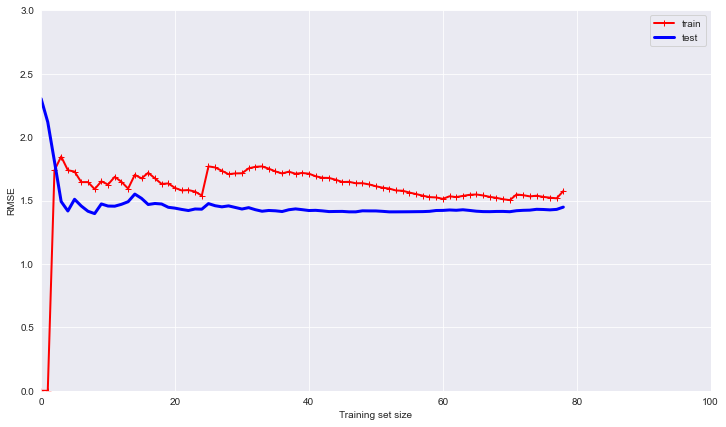

In [36]:
## creating a linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
plot_learning_curve(lr,X,y)
print("Underfitting Condition:")

**Explanation:**

**When there are just one or two instances in the training set, the model can fit them perfectly, which iS why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training data doesn't make the average error much better or worse.**

**Now let's take a look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation erro slowly goes down. However, once again a straight line cannot do a good job modelling the data, so the error ends up at a plateau, very close to the other curve**

**These learning curve are typical of a model that's underfitting. Both curves have reached a plateau; they are close and high**

Overfitting Condition:


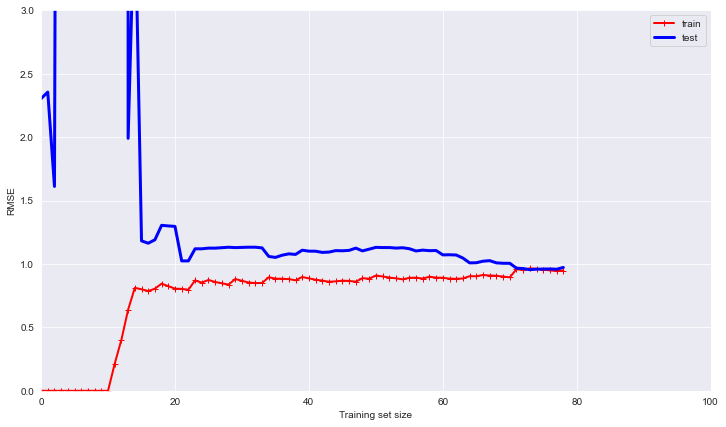

In [37]:
## Creating a polynomial regression model of 10th degree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('poly_feat',PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg',LinearRegression())
])

plot_learning_curve(pipe,X,y)
print("Overfitting Condition:")

**Explaination:**

**These learning curves look a bit like the previous ones, but there are two very important differences:**

**1. The error on the training data is much lower than with the linear regression model**

**2. There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer**

**NOTE: One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error. Another way could be to use the less complex model**

Generalised Model:


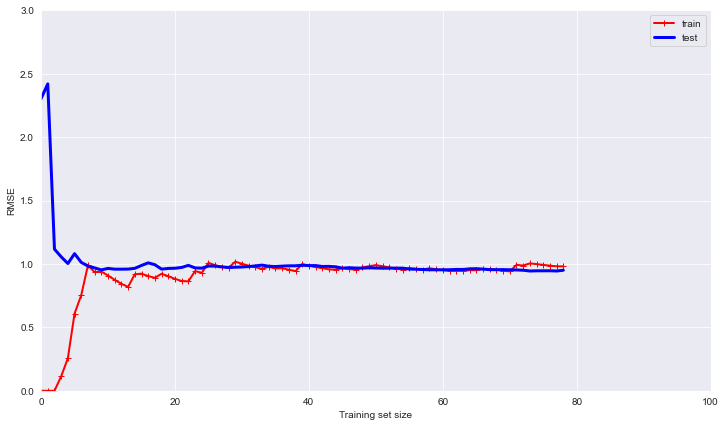

In [38]:
 ## Let's use less complex model to fit on the data i.e., Polynomial regression of degree 2
    
pipe2 = Pipeline([
    ('poly_feat',PolynomialFeatures(degree=2,include_bias=False)),
    ('lin_reg',LinearRegression())
])

plot_learning_curve(pipe2,X,y)
print("Generalised Model:")

**This model seems to be working well on both training and validation data**